In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cols=[]
rows=[]
for dM in ['00','10','-10','01','0-1']:
    for price_relation_d in range(6):
        for s1_imb_d in range(3):
            for s2_imb_d in range(3):
                s1_imb_d, s2_imb_d, price_relation_d = str(s1_imb_d),str(s2_imb_d),str(price_relation_d)
                cols.append(price_relation_d+s1_imb_d+s2_imb_d+dM)
                
for price_relation_d in range(6):
    for s1_imb_d in range(3):
        for s2_imb_d in range(3):
            s1_imb_d, s2_imb_d, price_relation_d = str(s1_imb_d),str(s2_imb_d),str(price_relation_d)
            rows.append(price_relation_d+s1_imb_d+s2_imb_d)
            
m4 = pd.DataFrame(0, index=rows, columns=cols)

In [3]:
df=pd.read_csv("SH_SDS_data_2.csv",index_col=0)

In [4]:
df['dM1']=1*(df.mid1_diff>0)
df.dM1-=1*(df.mid1_diff<0)
df['dM2']=1*(df.mid2_diff>0)
df.dM2-=1*(df.mid2_diff<0)

df['residual_bucket'],bins_res = pd.cut(df['residuals'], 6, labels=False, retbins=True)
df['residual_bucket_later'] = pd.cut(df['residual_later'], bins_res, labels=False)

df['imb1_bucket'],bins_imb1 = pd.cut(df.imb1, 3, labels=False, retbins=True)
df['imb2_bucket'],bins_imb2 = pd.cut(df.imb2, 3, labels=False, retbins=True)
df['imb1_bucket_later'] = pd.cut(df['imb1_later'], bins_imb1, labels=False)
df['imb2_bucket_later'] = pd.cut(df['imb2_later'], bins_imb2, labels=False)

In [5]:
df['current_state']=df["residual_bucket"].astype(str) + df["imb1_bucket"].astype(str) + df["imb2_bucket"].astype(str)
df['later_state']=df["residual_bucket_later"].astype(str)+df["imb1_bucket_later"].astype(str)+df["imb2_bucket_later"].astype(str)+df.dM1.astype(str)+df.dM2.astype(str)

In [6]:
x=df.dM1.astype(str)+df.dM2.astype(str)
x.value_counts()

00      3028
0-1      227
01       227
11       110
-1-1     110
-10      102
10       102
dtype: int64

In [7]:
df.drop(index=df.index[np.where((x=='-1-1')|(x=='11'))],inplace=True)

In [8]:
prob_raw=pd.crosstab(df.current_state,df.later_state, normalize='index')  # raw prob table
prob = m4.add(prob_raw,fill_value=0)  # complete probability table
prob=prob[list(m4.columns)]  # reorder elements

In [9]:
prob

,00000,00100,00200,01000,01100,01200,02000,02100,02200,10000,...,4220-1,5000-1,5010-1,5020-1,5100-1,5110-1,5120-1,5200-1,5210-1,5220-1
000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
001,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
002,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
010,0.0,0.0,0.0,0.222222,0.0,0.0,0.055556,0.055556,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
012,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
020,0.0,0.0,0.0,0.034483,0.0,0.0,0.362069,0.120690,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
021,0.0,0.0,0.0,0.056180,0.0,0.0,0.134831,0.370787,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
022,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
100,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


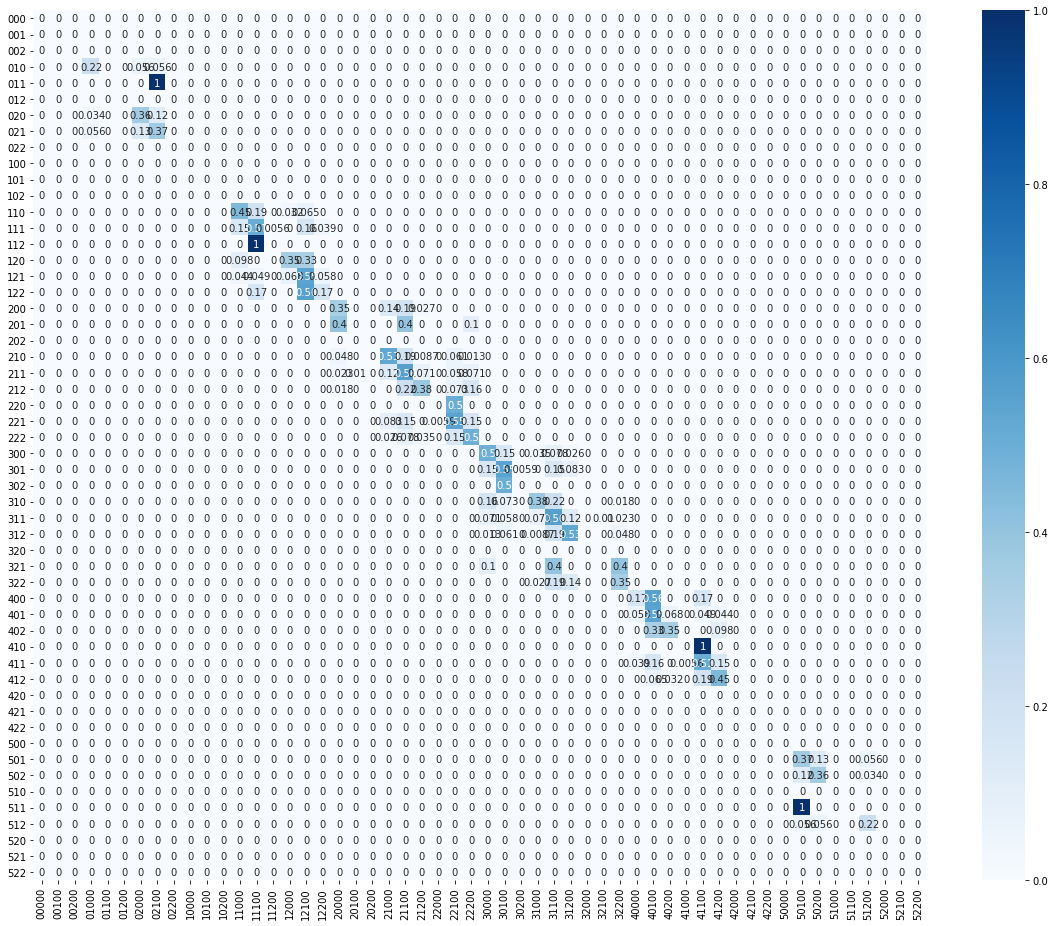

In [10]:
# price no change
plt.figure(figsize=(20,16))
sns.heatmap(prob.iloc[:54,:54],annot = True,cmap="Blues")
plt.yticks(rotation=0) 
plt.show()

In [11]:
prob.to_csv('SH_SDS_transition_matrix.csv')

In [12]:
df.to_csv('SH_SDS_data_3.csv')